# Melbourne Data Science group - datathon 2019

[Buy Low Sell High' 2019 Melbourne Datathon - INTRODUCTION](http://anotherdataminingblog.blogspot.com/2019/08/buy-low-sell-high.html)

Below us python code to get you going (similar to R code given with dataset [blog post](http://anotherdataminingblog.blogspot.com/2019/08/buy-low-sell-high-data-and-code.html))


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Assuming file is stored in data folder in the same directory 'data/melbdatathon2019_buylowsellhigh.csv'
datafile = "..\data\datamelbdatathon2019_buylowsellhigh.csv"



In [2]:
#load data file
df = pd.read_csv("..\data\melbdatathon2019_buylowsellhigh.csv")

In [3]:
#check the shape of the data frame
df.shape

(4907361, 19)

In [4]:
# list column names
df.columns

Index(['keys_pair', 'minutesSinceStart', 'gap', 'barClosePrice', 'tradePrice',
       'Lpred1b', 'Lpred2b', 'Lpred3b', 'Lpred4b', 'Lpred5b', 'Lpred6b',
       'Lpred7b', 'Lpred8b', 'Lpred9b', 'Lpred10b', 'Lpred11b', 'Lpred12b',
       'Lpred13b', 'Lpred14b'],
      dtype='object')

In [5]:
# list unique key_pairs
print(f"unique key_pairs = {df['keys_pair'].unique().shape[0]}")
df['keys_pair'].unique()

unique key_pairs = 36


array(['0x_bitcoin', 'bitcoin_usdollar', 'bitcoincash_usdollar',
       'cardano_bitcoin', 'dash_usdollar', 'litecoin_bitcoin',
       'litecoin_tetherusd', 'monero_bitcoin', 'qtum_bitcoin',
       'ripple_bitcoin', 'ripple_usdollar', 'stratis_bitcoin',
       'tron_tetherusd', 'zcash_bitcoin', 'pair_1', 'pair_2', 'pair_3',
       'pair_4', 'pair_5', 'pair_6', 'pair_7', 'pair_8', 'pair_9',
       'pair_10', 'pair_11', 'pair_12', 'pair_13', 'pair_14', 'pair_15',
       'pair_16', 'pair_17', 'pair_18', 'pair_19', 'pair_20', 'pair_21',
       'pair_22'], dtype=object)

In [6]:
#price information is missing for the unnamed pairs
filter_x1 = df.keys_pair == 'pair_1'
x1 = df[filter_x1]
x1.shape
#132,721, 19

(132721, 19)

In [7]:
# summarise dataframe
x1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
minutesSinceStart,132721.0,352090.381628,206304.298257,0.000000,173925.000000,349885.000000,521845.000000,711305.000000
gap,132721.0,0.001582,0.039746,0.000000,0.000000,0.000000,0.000000,1.000000
barClosePrice,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tradePrice,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lpred1b,132721.0,-0.000168,0.000895,-0.016060,-0.000530,-0.000190,0.000167,0.012517
Lpred2b,132721.0,-0.000360,0.001292,-0.020643,-0.000932,-0.000398,0.000186,0.015790
Lpred3b,132721.0,-0.000534,0.001569,-0.022022,-0.001276,-0.000576,0.000194,0.016345
Lpred4b,132721.0,-0.000699,0.001769,-0.022716,-0.001596,-0.000739,0.000171,0.016070
Lpred5b,132721.0,-0.000856,0.001922,-0.023511,-0.001879,-0.000900,0.000128,0.015323
Lpred6b,132721.0,-0.001001,0.002053,-0.024841,-0.002114,-0.001056,0.000060,0.015092


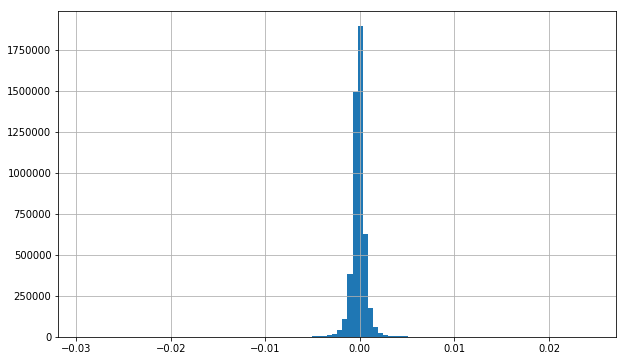

In [8]:
#distribution of the predictions
df.Lpred1b.hist(bins=100, figsize=(10, 6))

In [9]:
#time series of prices and predictions
filter_x2 = df.keys_pair == 'bitcoin_usdollar'
x = df[filter_x2].head(1000)

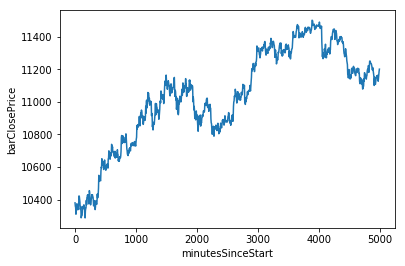

In [10]:
sns.lineplot(x='minutesSinceStart', y='barClosePrice', data=x)

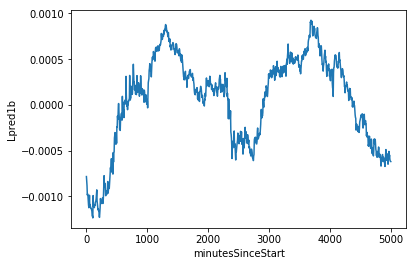

In [11]:
sns.lineplot(x='minutesSinceStart', y='Lpred1b', data=x)